# Hierarchical Clustering

Authors: Pauline Chow & Joseph Nelson (DC & DSI instructor)

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?

We're going to be using a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.

You might be faced with a situation like this is you were asked to tackle demographic info or survey responses, so it's a useful test

Note to instructor: Walk through cluster linkage exercise with points. Then create a denograph out of these points

Tips for applying clustering techniques: 
- Kmeans provides clustering allocations without hierarchy or organizations
- A common trick is use hierarchical clustering to pick k (see below), and then run k-means
starting from the clusters found by Ward’s method to reduce the sum of squares
from a good starting point.

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet

%matplotlib inline

In [12]:
# load the data
file_link = 'https://raw.githubusercontent.com/generalassembly-studio/DSI-course-materials/master/curriculum/04-lessons/week-07/3.2-lesson/assets/datasets/lang.csv?token=AGijO7zv8EQCEhdrPQLMgcLNUvLn4ugZks5XmG79wA%3D%3D'
lang = pd.read_csv(file_link)
print lang.shape
lang.head()

(16, 13)


,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


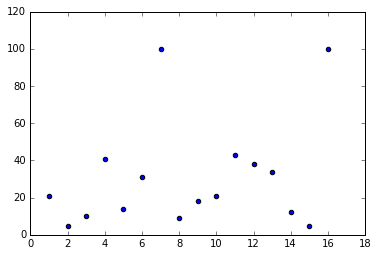

In [5]:
# scatter to guess clusters
plt.scatter(lang['country'], lang['english'])
plt.show()

In [6]:
# Now, let's convert our data to a matrix to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:
X = lang.as_matrix(columns=None)

Ward’s method says that the distance between two clusters, A and B, is how
much the sum of squares will increase when we merge them. With hierarchical clustering, the sum of squares starts out at zero (because
every point is in its own cluster) and then grows as we merge clusters. Ward’s method keeps this growth as small as possible

Ward suggested a general agglomerative hierarchical clustering procedure, where the criterion for choosing the pair of clusters to merge at each step is based on the optimal value of an objective function. The objective function is like a minimum variance method.

![Ward Distance](http://docs.scipy.org/doc/scipy-0.14.0/reference/_images/math/fcb5b2a45835a99696777c876616521c2091c7ba.png)

[Associated Paper](http://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf)

![Comparing](https://github.com/ga-students/DSI_SM_01/blob/master/curriculum/week-07/3.1-lesson-hierarchical-clustering/assets/clustering%20compared.png?raw=true)

In [63]:
Z = linkage(X, 'ward')

We can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points: 

scipy.pdist == Pairwise distances between observations in n-dimensional space.

In [64]:
c, coph_dists = cophenet(Z, pdist(X))

[Scipy documentation]( http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html)

Cophenetic similarity is the distance of two objects is a measure of how similar those two objects have to be in order to be grouped into the same cluster. The cophenetic distance between two objects is the height of the dendrogram where the two branches that include the two objects merge into a single branch.

In [65]:
coph_dists.shape

(120,)

In [15]:
# let's 'c' how it did (or cophentic correlation distance)
c

0.66645925603242939

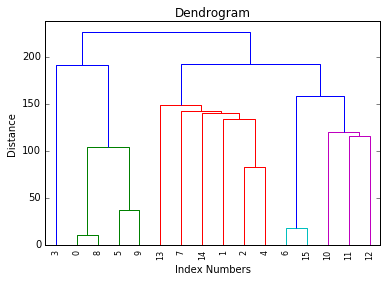

In [16]:
# now let's make our dendrogram
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [25]:
# we can see that no links exist above a distance of 200 
#so we will set maximum distance at 200 and use the fclusters function 
#from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200
clusters = fcluster(Z, max_dist, criterion='distance')
print clusters
#

[1 2 2 1 2 1 2 2 1 1 2 2 2 2 2 2]


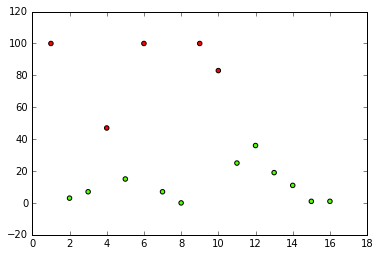

In [23]:
# Let's plot our data and assign the class labels as the color:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism')
plt.show()

# How about in sklearn?

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [30]:
#knn_graph = kneighbors_graph(X, 10, include_self=False)

Note that Agglomerative Clustering is This method is most appropriate for quantitative variables, and not binary variables.

In [42]:
model = AgglomerativeClustering(linkage='ward',
                                            n_clusters=3)

In [43]:
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3, n_components=None,
            pooling_func=<function mean at 0x7fc668b730c8>)

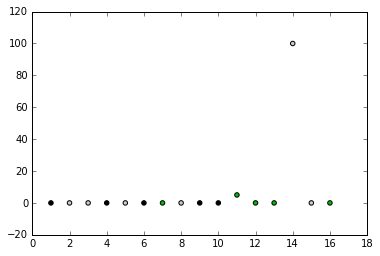

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)

Why scipy over sklearn? Time is a useful way to compare efficiency and effectiveness of packages

In [58]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import numpy as np
import time

l = 10; iters = 50
d = X

t = time.time()
for _ in xrange(iters):
    clustering = AgglomerativeClustering(n_clusters=l-1,
        affinity='euclidean', linkage='complete')
    clustering.fit(d)
scikit_time = (time.time() - t) / iters
print 'scikit-learn Time: {0}s'.format(scikit_time)

t = time.time()
for _ in xrange(iters):
    linkage(d, 'complete')
scipy_time = (time.time() - t) / iters
print 'SciPy Time: {0}s'.format(scipy_time)

print 'scikit-learn Speedup: {0}'.format(scipy_time / scikit_time)

scikit-learn Time: 0.000189399719238s
SciPy Time: 3.48424911499e-05s
scikit-learn Speedup: 0.183962739174
